<a href="https://colab.research.google.com/github/gabrieljordan23/projeto_construtora_shopping_em_python/blob/main/consulta_dados_construcao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Olá, como vai?

Este script é detestinado a realizar consultas na base de dados que contém informações a respeito das obras de nossa construtora.

Pra começar, gostaria de ver a relação de EC's por status?
Digite 'sim' ou 'nao'

nao
OK
Gostaria de ver os EC's que estão em fase inicial de obra?
Digite 'sim' ou 'nao'

sim
Segue abaixo os estabelecimentos inicio de construção, levando em conta menos de 6 meses de obra:

           Estabelecimento         Status  Tempo Estado
36  SUPER SHOPPING OSASCO   Em construcao      1     SP
37           GARAGEM XINGU  Em construcao      2     SP
39            DIAMOND MALL  Em construcao      3     MG
43       COLEGIO SAO LUIS   Em construcao      2     SP
46       BRASILIA SHOPPING  Em construcao      4     DF
49             JK SHOPPING  Em construcao      5     DF

Gostaria de ver a relação de EC's por estado?
Digite 'sim' ou 'nao'

sim
Digite a sigla do estado que deseja consultar:

CE

Segue abaixo os estabelecimentos no estado e seus respectivos

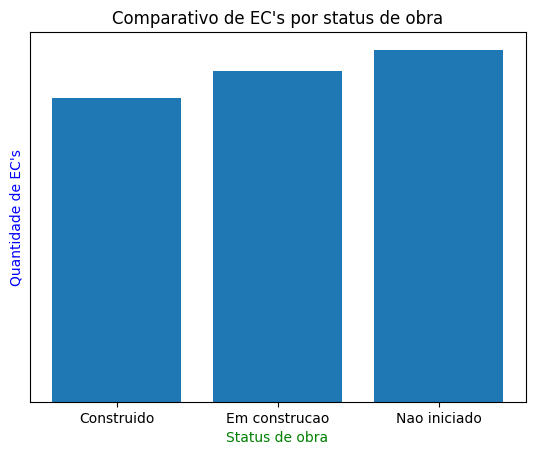

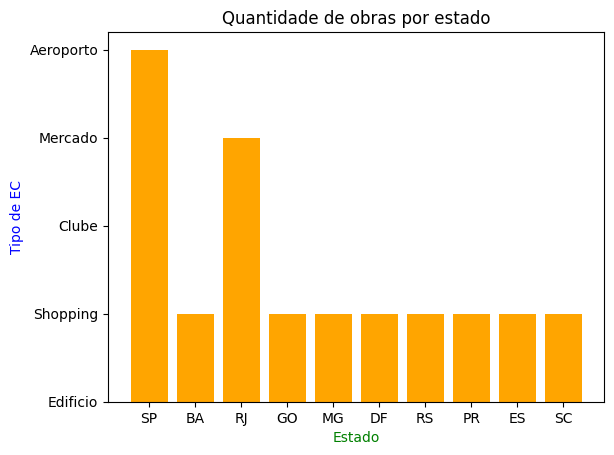

A seguir se encontram alguns dados estatísticos a respeito de nossas obras:

O tempo médio de construção dos estabelecimentos é de 13.81 meses.

O tempo máximo de construção até o momento foi de 35 meses corridos.

Desvio padrao do tempo de obras  é de 10.141781


In [1]:
#------------------------------------------------------------------------------
#Nome do Script: consulta_dados_construcao.py
#------------------------------------------------------------------------------
#Autor                              Data                           Descrição
#-----------------------------   ----------                    ----------------
#Gabriel Aragão					          19/12/2020                        Script
#------------------------------------------------------------------------------
#EC'S = ESTABELECIMENTOS COMERCIAIS
#IMPORTANDO BIBLIOTECA PANDAS
import pandas as pd
#IMPORTANDO BLIBLIOTECA MATPLOTLIB PARA PLOTAR GRÁFICOS
import matplotlib.pyplot as plt
#CRIANDO DATAFRAME E IMPORTANDO DADOS DA TABELA BCCcontrutora.csv QUE SE ENCONTRA NO DROPBOX
df = pd.read_csv('https://www.dropbox.com/s/spgv3qfvjffbu11/BCCconstrutora.csv?dl=1', sep = ",")
#SAUDAÇÃO PARA O USUÁRIO
print("Olá, como vai?\n")
print("Este script é detestinado a realizar consultas na base de dados que contém informações a respeito das obras de nossa construtora.\n")
#FILTRAR EC'S POR STATUS DE CONSTRUÇÃO: Em construcao, Nao iniciado, Construido
print("Pra começar, gostaria de ver a relação de EC's por status?\nDigite 'sim' ou 'nao'\n")
resp1 = str(input())
#ESTRUTURA CONDICIONAL PARA VALIDAR RESPOSTA DO USUÁRIO
if resp1 == "sim":
  print("Digite o status de construção que deseja consultar:")
  status = input()
  cons = df[["Estabelecimento","Status","Estado","Tempo"]].query("Status == '"+status+"'")
  stat = cons.sort_values(by="Tempo")
  print()
  print("Segue abaixo os estabelecimentos com status:\n",status)
  print(stat)
  print()
elif resp1 == 'nao':
  print("OK")
elif resp1 != 'sim' or 'nao':
  print("Desculpe, não entendi")
#EC'S EM INICIO DE CONSTRUÇÃO, OU SEJA, MENOS DE 6 MESES DE CONSTRUÇÃO
print("Gostaria de ver os EC's que estão em fase inicial de obra?\nDigite 'sim' ou 'nao'\n")
resp2 = str(input())
if resp2 == 'sim':
  print("Segue abaixo os estabelecimentos inicio de construção, levando em conta menos de 6 meses de obra:\n")
  inicio = df[["Estabelecimento","Status","Tempo","Estado"]].query("Tempo < 6 & Status == 'Em construcao'")
  print(inicio)
  print()
elif resp2 == 'nao':
  print("OK")
elif resp2 != 'sim' or 'nao':
  print("Desculpe, não entendi")
#FILTRAR EC'S POR SIGLA DE ESTADO: BA, DF, ES, GO, MG, PR, SP, PR, RS, SC, SP
print("Gostaria de ver a relação de EC's por estado?\nDigite 'sim' ou 'nao'\n")
resp3 = str(input())
if resp3 == 'sim':
  print("Digite a sigla do estado que deseja consultar:\n")
  estado = input()
  print()
  print("Segue abaixo os estabelecimentos no estado e seus respectivos status:\n",estado)
  table = df[["Estabelecimento","Status","Estado","Tempo"]].query("Estado == '"+estado+"'")
  print(table)
  print()
elif resp3 == 'nao':
  print("OK")
elif resp3 != 'sim' or 'nao':
  print("Desculpe, não entendi")
#CONSTRUÇÕES AINDA NÃO INICIADAS
print("Gostaria de ver a relação de EC's que ainda não iniciaram a construção?\nDigite 'sim' ou 'nao'\n")
resp4 = str(input())
if resp4 == 'sim':
  nao_inic = df[["Estabelecimento","Status","Tempo","Estado"]].query('Tempo == 0')
  print()
  print("Segue abaixo os EC's que ainda não iniciaram a construção:\n")
  print(nao_inic)
  print()
elif resp4 == 'nao':
  print("OK")
elif resp4 != 'sim' or 'nao':
  print("Desculpe, não entendi")
#EC COM MAIOR TEMPO DE OBRA
print("Gostaria de ver qual o EC se encontra com maior tempo de construção?\nDigite 'sim' ou 'nao'\n")
resp5 = str(input())
if resp5 == 'sim':
  estab = df.loc[df['Tempo'] == max(df["Tempo"]), 'Estabelecimento']
  val = pd.DataFrame([estab]).transpose()
  print("Segue abaixo o estabelecimento com maior tempo de construção:\n")
  print(val)
  print()
elif resp5 == 'nao':
  print("OK")
elif resp5 != 'sim' or 'nao':
  print("Desculpe, não entendi")
#QUESTIONA O USUÁRIO SE TEM INTERESSE EM VER OS DADOS DE MANEIRA GRÁFICA
print("Gostaria de ver os dados de maneira gráfica?\nDigite 'sim' ou 'nao'\n")
resp6 = str(input())
if resp6 == "sim":
  print("A seguir se encontram duas visões a respeito das obras:\n")
  #CRIANDO GRÁFICO DE BARRAS POR STATUS DE OBRA
  plt.title("Comparativo de EC's por status de obra")
  plt.bar(df['Status'],df['Estabelecimento'])
  plt.xlabel('Status de obra', color = 'green')
  plt.ylabel("Quantidade de EC's", color = 'blue')
  plt.yticks([])
  plt.show()
  #CRIANDO GRÁFICO DE BARRAS POR ESTADO E TIPO DE EC
  plt.title("Quantidade de obras por estado")
  plt.bar(df['Estado'],df['Tipo_de_estabelecimento'],color = "orange")
  plt.xlabel('Estado', color = 'green')
  plt.ylabel("Tipo de EC", color = 'blue')
  plt.show()
elif resp6 == "nao":
  print("Ok, obrigado pela atenção!\n")
#DECLARANDO VARIÁVEIS PARA CÁLCULOS ESTATÍSTICOS
print("A seguir se encontram alguns dados estatísticos a respeito de nossas obras:\n")
tempo_construcao = df['Tempo']
estabelecimento = df['Estabelecimento']
media1 = tempo_construcao.mean()
print("O tempo médio de construção dos estabelecimentos é de","%.2f" %media1, "meses.\n")
print("O tempo máximo de construção até o momento foi de",max(df["Tempo"]), "meses corridos.\n")
desvp1 = tempo_construcao.std()
print("Desvio padrao do tempo de obras  é de", "%.6f" %desvp1)